## What to do
2. Proveďte explorativní analýzu zvolené datové sady. Pro každý následující bod implementujte odpovídající sekci ve zdrojovém kódu a zjištěné výsledky popište v dokumentaci:
    - **Pavel** prozkoumejte jednotlivé atributy datové sady, jejich typ a hodnoty, kterých nabývají (počet hodnot, nejčastější hodnoty, rozsah hodnot atd.)
    - **Pavel** prozkoumejte rozložení hodnot jednotlivých atributů pomocí vhodných grafů, zaměřte se i na to, jak hodnota jednoho či dvou atributů ovlivní rozložení hodnot jiného atributu. Do dokumentace vložte alespoň 5 různých grafů, zobrazujících zjištěná rozložení hodnot. Použijte různé typy grafů (např. bodový graf, histogram, krabicový nebo houslový graf, graf složený z více podgrafů apod.).
    - **Pavel** zjistěte, zda zvolená datová sada obsahuje nějaké odlehlé hodnoty.
    - proveďte podrobnou analýzu chybějící hodnot (celkový počet chybějících hodnot, počet objektů s více chybějícími hodnotami atd.).
    - proveďte korelační analýzu numerických atributů (k analýze využijte i grafy a korelační koeficienty).

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from os import getcwd
import seaborn as sns
from re import split

sns.set_theme()

### Global definition

In [39]:
data_dir = Path(getcwd()) / "data"

### Analysis of the dataset
- what is the shape of individual provided datasets
- what are the columns
- what are unique data types in the columns
- description of numerical and categorical columns

In [40]:
d1, d2, d3 = [pd.read_csv(f) for f in data_dir.iterdir() if f.suffix == ".csv"]

In [41]:
print(f"Shape: {d1.shape}")

Shape: (1253, 23)


In [42]:
d1.describe()

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
count,1226.000000,1.253000e+03,8.850000e+02,373.000000
mean,32.509788,8.027904e+07,6.322459e+05,12.967828
std,5.663804,2.825061e+09,1.680508e+07,15.275174
min,20.000000,1.000100e+04,1.100000e+04,0.000000
25%,29.000000,5.880000e+04,5.500000e+04,0.000000
50%,32.000000,7.000000e+04,6.500000e+04,0.000000
75%,35.000000,8.000000e+04,7.500000e+04,30.000000
max,69.000000,1.000000e+11,5.000000e+08,40.000000


As we see from the description of the dataset, there might be some errors in the data frame that a are causing problems with deviation of the values, so we need to drop them.
Also some retyping of the data

In [43]:
d1.rename(columns={'Yearly brutto salary (without bonus and stocks) in EUR': 'yearly_brutto_salary',
                   'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country': 'yearly_brutto_salary_year_ago',
                   'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week': 'shorten_week',
                   'Total years of experience': 'experience_year',
                   'Years of experience in Germany': 'experience_year_germany',
                   'Yearly bonus + stocks in EUR': 'yearly_bonus',
                   'Annual bonus+stocks one year ago. Only answer if staying in same country': 'yearly_bonus_year_ago',
                   'Number of vacation days': 'vacation_days',
                   'Have you lost your job due to the coronavirus outbreak?' : 'lost_job',
                   'Employment status': 'employment_status',
                   'Company size': 'company_size',
                   'Position': 'position',
                   'Your main technology / programming language': 'main_tech',
                   'Other technologies/programming languages you use often': 'other_tech',
                   'Seniority level': 'seniority_level',
                   'Company type': 'company_type',
                   'Main language at work': 'main_language',
                   'Сontract duration': 'contract_duration',
                   'City': 'city',
                   'Gender': 'gender',
                   'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR': 'additional_support',
                   'Age': 'age',
                   },
                   inplace=True)
# d1 = d1[~d1.main_tech.isna()]

Analysis for missing/NaN values

In [44]:
print("Number of missing values in each column:")
print(d1.isna().sum())

Number of missing values in each column:
Timestamp                          0
age                               27
gender                            10
city                               0
position                           6
experience_year                   16
experience_year_germany           32
seniority_level                   12
main_tech                        127
other_tech                       157
yearly_brutto_salary               0
yearly_bonus                     424
yearly_brutto_salary_year_ago    368
yearly_bonus_year_ago            639
vacation_days                     68
employment_status                 17
contract_duration                 29
main_language                     16
company_size                      18
company_type                      25
lost_job                          20
shorten_week                     880
additional_support               791
dtype: int64


In [45]:
n = d1.shape[0] * .4
sum_missing = d1.isna().sum()
sum_missing = sum_missing[sum_missing < n]
d1 = d1[sum_missing.index]
print(f"Columns with less than half missing values ({n}): ")
print(sum_missing)

Columns with less than half missing values (501.20000000000005): 
Timestamp                          0
age                               27
gender                            10
city                               0
position                           6
experience_year                   16
experience_year_germany           32
seniority_level                   12
main_tech                        127
other_tech                       157
yearly_brutto_salary               0
yearly_bonus                     424
yearly_brutto_salary_year_ago    368
vacation_days                     68
employment_status                 17
contract_duration                 29
main_language                     16
company_size                      18
company_type                      25
lost_job                          20
dtype: int64


In [46]:
with open("missing.tex", "w") as f:
    sum_missing.sort_values(ascending=False)[:5].to_latex(f)
    # f.write(sum_missing.to_latex())

/tmp/ipykernel_132625/4060023741.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  sum_missing.sort_values(ascending=False)[:5].to_latex(f)


In [47]:
print(f'Number of rows with more than one NaN value: {d1[d1.isna().sum(axis=1) > 1].shape[0]}')
print(f'Maximum number of NaN values in on row: {d1.isna().sum(axis=1).max()}')

Number of rows with more than one NaN value: 331
Maximum number of NaN values in on row: 17


(0.0, 500000000.0)

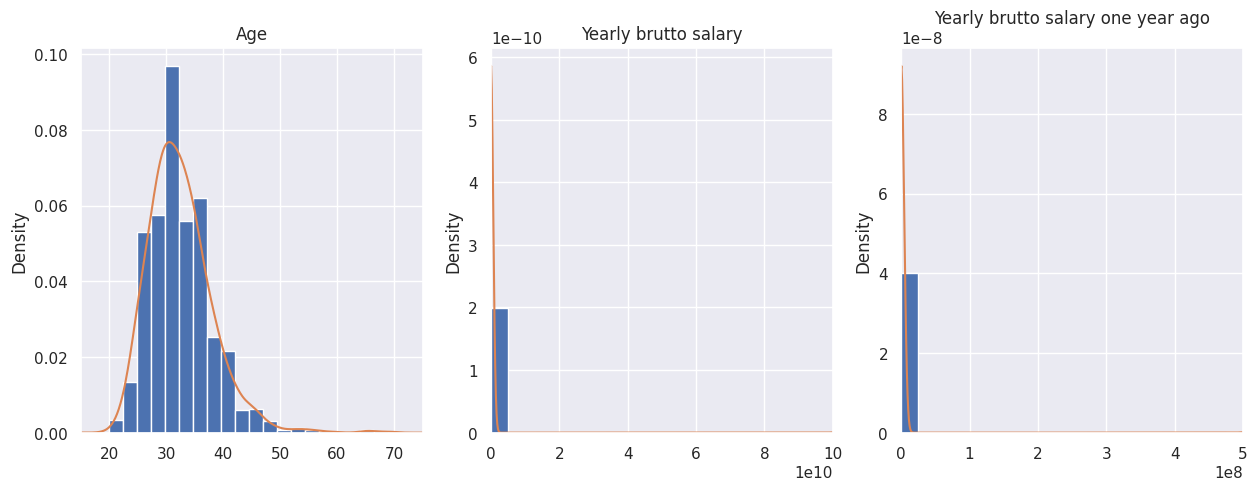

In [48]:
fix, ax = plt.subplots(1, 3, figsize=(15, 5))
# d1.hist(ax=ax)
ax[0].set_title("Age")
d1.age.hist(bins=20, density=True, ax=ax[0])
d1.age.plot(kind='kde', ax=ax[0])
ax[0].set_xlim(15, 75)

ax[1].set_title("Yearly brutto salary")
d1.yearly_brutto_salary.hist(ax=ax[1], bins=20, density=True)
d1.yearly_brutto_salary.plot(kind='kde', ax=ax[1])
ax[1].set_xlim(0, d1.yearly_brutto_salary.max())

ax[2].set_title("Yearly brutto salary one year ago")
d1.yearly_brutto_salary_year_ago.hist(ax=ax[2], bins=20, density=True)
d1.yearly_brutto_salary_year_ago.plot(kind='kde', ax=ax[2])
# ax[2].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax[2].set_xlim(0, d1.yearly_brutto_salary_year_ago.max())


Remove rows where salary doesn't make sense

In [49]:
d1 = d1[(d1.yearly_brutto_salary < 8e5) & (d1.yearly_brutto_salary_year_ago < 6e5) & (d1.company_size.notna())]
print(f"Shape: {d1.shape}")

Shape: (880, 20)


In [50]:
categories = ['up to 10', '11-50', '51-100', '101-1000', '1000+']
d1.company_size = pd.Categorical(d1.company_size, categories=categories, ordered=True)

Convert 'Total years of experience' column to numeric ignoring the errors

In [51]:
age_mean = d1.age.median()
d1.age.fillna(age_mean, inplace=True)

d1.experience_year = pd.to_numeric(np.char.replace(d1.experience_year.values.astype(str), ',', '.'), errors='coerce')
exp_mean = d1.experience_year.mean()
d1.experience_year.fillna(exp_mean, inplace=True)

Transform 'Years of experience in Germany' column so there are correct data, change data type to numeric

In [52]:
d1.loc[np.isin(d1.experience_year_germany, ['3 (in Poland)', '4 (in Switzerland), 0 (in Germany)']), 'experience_year_germany'] = 0
d1.experience_year_germany = pd.to_numeric(d1.experience_year_germany, errors='coerce')
exp_ger_mean = d1.experience_year_germany.mean()
d1.experience_year_germany.fillna(exp_ger_mean, inplace=True)

Correct 'Yearly bonus + stocks in EUR' column

In [53]:
d1.yearly_bonus = pd.to_numeric(d1.yearly_bonus, errors='coerce')
bonus_mean = d1.yearly_bonus.mean()
d1.yearly_bonus.fillna(bonus_mean, inplace=True)

In [54]:
max_vacation_days = pd.to_numeric(d1.vacation_days, errors='coerce').max()  # find max value from data that can be converted to numeric
d1.loc[d1.vacation_days.str.contains('unlimited|Unlimited') == True, 'vacation_days'] = max_vacation_days
d1.vacation_days = d1.vacation_days.str.extract('(\d+)', expand=False).fillna(0).astype(int)  # extract only digits from string

Correct 'Have you lost your job due to the coronavirus outbreak?' column

In [55]:
yes_no_map = {'Yes': True, 'No': False}
d1.lost_job = d1.lost_job.map(yes_no_map)
d1.lost_job.fillna(d1.lost_job.mode(), inplace=True)

Correct 'Employment status' column

Maybe we don't actually need column 'Employment status' because it is very unreliable and wouldn't give us any useful information

In [56]:
d1.employment_status.value_counts()

Full-time employee                                                     847
Self-employed (freelancer)                                              21
Part-time employee                                                       5
Founder                                                                  2
working student                                                          1
Intern                                                                   1
full-time, but 32 hours per week (it was my request, I'm a student)      1
Name: employment_status, dtype: int64

Correct 'Company size' column

Process technologies columns

In [57]:
d1.main_tech = d1.main_tech.fillna('')
d1.main_tech = d1.main_tech.str.replace('kubernetes', 'k8s', case=False)
d1.main_tech = d1.main_tech.str.replace(r'(javascript|javscript)', 'js', case=False)
d1.main_tech = d1.main_tech.str.replace('pythin', 'python', case=False)
d1.main_tech = d1.main_tech.str.replace('golang', 'go', case=False)
d1.main_tech = d1.main_tech.str.replace('c#', 'csharp', case=False)
d1.main_tech = d1.main_tech.str.replace(r'c\+\+', 'cpp', case=False)
d1.insert(1, "main_tech_list", d1.main_tech.str.lower().apply(lambda x: [i for i in split(r'\W+', x) if i])) 


/tmp/ipykernel_132625/2000042957.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  d1.main_tech = d1.main_tech.str.replace(r'(javascript|javscript)', 'js', case=False)
/tmp/ipykernel_132625/2000042957.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  d1.main_tech = d1.main_tech.str.replace(r'c\+\+', 'cpp', case=False)


Correct 'Seniority level' column: chose top 6 most frequent levels. We are taking Head == Principal

In [58]:
top_6 = d1.seniority_level.value_counts()[:6].index.tolist()
d1.loc[d1.seniority_level == 'Head', 'seniority_level'] = 'Principal' # merge Head and Principal
d1 = d1[np.isin(d1.seniority_level, top_6)]
level_categories = ['Junior', 'Middle', 'Senior', 'Lead', 'Principal']
d1.seniority_level = pd.Categorical(d1.seniority_level, categories=level_categories, ordered=True)

Change scale of some numeric attributes

In [59]:
d1.describe()

,age,experience_year,experience_year_germany,yearly_brutto_salary,yearly_bonus,yearly_brutto_salary_year_ago,vacation_days
count,867.000000,867.000000,867.000000,867.000000,8.670000e+02,867.000000,867.000000
mean,33.079585,9.311600,4.293358,72893.171857,2.170084e+04,66503.572088,27.479815
std,5.406726,5.438726,3.606935,22147.814425,4.932515e+04,20686.679694,5.731522
min,22.000000,0.000000,0.000000,14712.000000,0.000000e+00,11000.000000,0.000000
25%,29.000000,5.000000,2.000000,60000.000000,2.000000e+03,55000.000000,27.000000
50%,33.000000,9.000000,4.000000,70200.000000,1.100000e+04,65000.000000,28.000000
75%,36.000000,12.000000,5.000000,82000.000000,2.165162e+04,75000.000000,30.000000
max,66.000000,40.000000,30.000000,250000.000000,1.150000e+06,230000.000000,60.000000


In [60]:
d1.yearly_brutto_salary = d1.yearly_brutto_salary / 1e4
d1.yearly_brutto_salary_year_ago = d1.yearly_brutto_salary_year_ago / 1e4
d1.yearly_bonus = d1.yearly_bonus / 1e4

In [61]:
d1.position.value_counts()[:5]

Software Engineer     281
Backend Developer     118
Data Scientist         79
Frontend Developer     53
QA Engineer            50
Name: position, dtype: int64

In [62]:
d1.describe()

,age,experience_year,experience_year_germany,yearly_brutto_salary,yearly_bonus,yearly_brutto_salary_year_ago,vacation_days
count,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000
mean,33.079585,9.311600,4.293358,7.289317,2.170084,6.650357,27.479815
std,5.406726,5.438726,3.606935,2.214781,4.932515,2.068668,5.731522
min,22.000000,0.000000,0.000000,1.471200,0.000000,1.100000,0.000000
25%,29.000000,5.000000,2.000000,6.000000,0.200000,5.500000,27.000000
50%,33.000000,9.000000,4.000000,7.020000,1.100000,6.500000,28.000000
75%,36.000000,12.000000,5.000000,8.200000,2.165162,7.500000,30.000000
max,66.000000,40.000000,30.000000,25.000000,115.000000,23.000000,60.000000


In [63]:
d1.describe(include=["object", 'category'])

,Timestamp,main_tech_list,gender,city,position,seniority_level,main_tech,other_tech,employment_status,contract_duration,main_language,company_size,company_type,lost_job
count,867,867,862,867,865,867,867,788,865,862,866,867,864,859
unique,864,138,3,86,107,5,178,438,5,3,12,5,47,2
top,24/11/2020 14:07:23,[python],Male,Berlin,Software Engineer,Senior,Java,Python,Full-time employee,Unlimited contract,English,1000+,Product,False
freq,2,154,734,484,281,417,141,28,838,828,702,334,553,819


### Graphical analysis of the dataset

(0.0, 23.0)

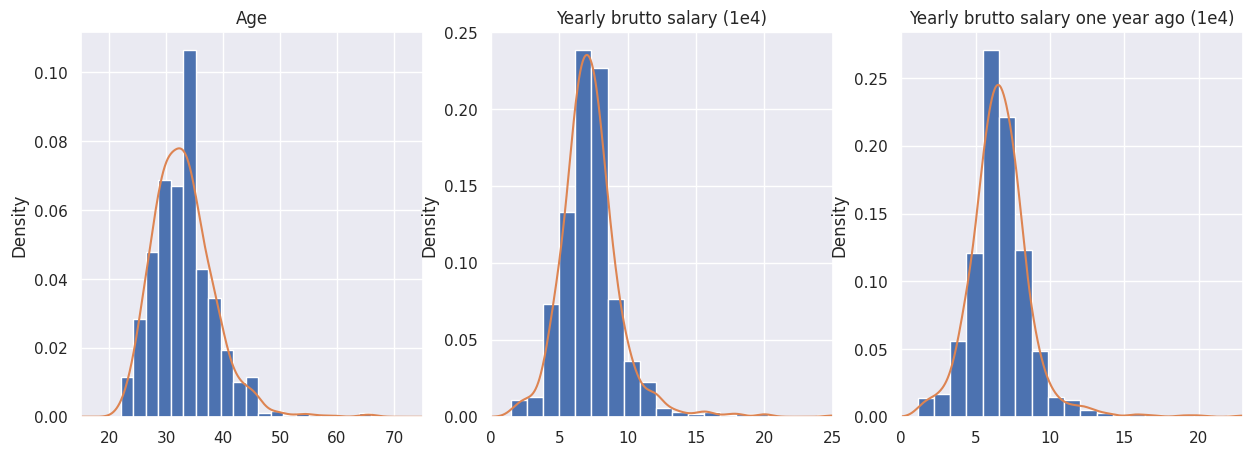

In [64]:
fig, ax = plt.subplots(1,3, figsize=(15, 5))
fig.tight_layout = True

ax[0].set_title("Age")
d1.age.hist(bins=20, density=True, ax=ax[0])
d1.age.plot(kind='kde', ax=ax[0])
ax[0].set_xlim(15, 75)

ax[1].set_title("Yearly brutto salary (1e4)")
d1.yearly_brutto_salary.hist(ax=ax[1], bins=20, density=True)
d1.yearly_brutto_salary.plot(kind='kde', ax=ax[1])
ax[1].set_xlim(0, d1.yearly_brutto_salary.max())

ax[2].set_title("Yearly brutto salary one year ago (1e4)")
d1.yearly_brutto_salary_year_ago.hist(ax=ax[2], bins=20, density=True)
d1.yearly_brutto_salary_year_ago.plot(kind='kde', ax=ax[2])
ax[2].set_xlim(0, d1.yearly_brutto_salary_year_ago.max())


Text(0.5, 1.0, 'Yearly brutto salary distribution')

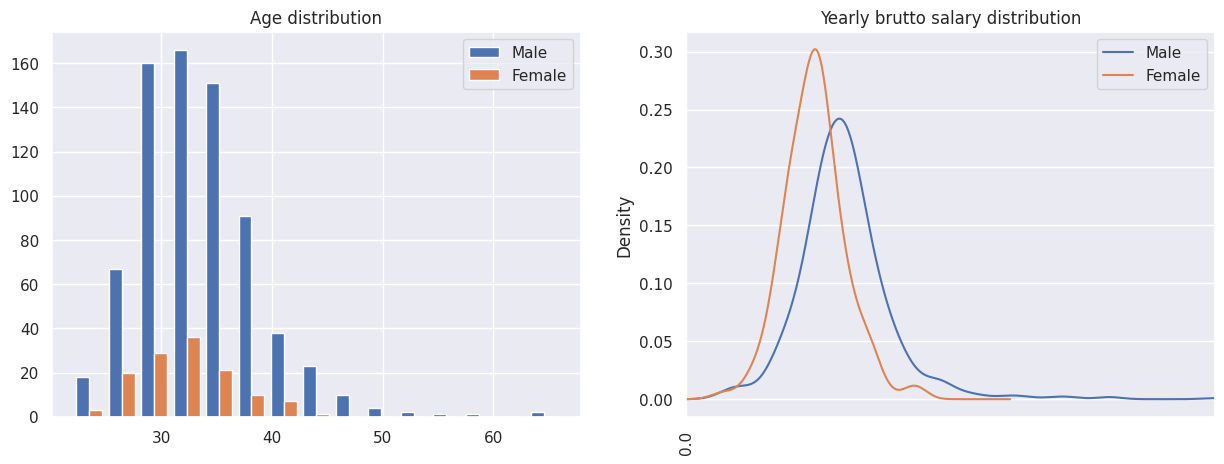

In [65]:
male = d1[d1.gender == "Male"]
female = d1[d1.gender == "Female"]
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist([male.age, female.age], label=["Male", "Female"], bins=15)
ax1.legend()
ax1.set_title("Age distribution")

male.yearly_brutto_salary.plot(kind='kde', ax=ax2, label='Male')
female.yearly_brutto_salary.plot(kind='kde', ax=ax2, label='Female')
ax2.set_xlim(0, d1.yearly_brutto_salary.max())
ax2.set_xticks(np.arange(0, d1.yearly_brutto_salary.max(), 15000))
ax2.set_xticklabels(ax2.get_xticks(), rotation = 90)
ax2.legend()
ax2.set_title("Yearly brutto salary distribution")


Text(0.5, 1.05, 'Pairplot for top 3 cities')

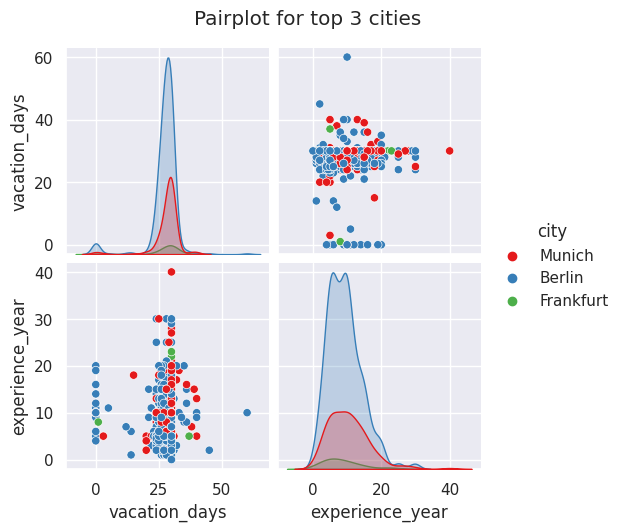

In [107]:
top_3_cities = d1.city.value_counts()[:3].index.tolist()
for_plot = d1[np.isin(d1.city, top_3_cities)]
sns.pairplot(data=for_plot[['city', 'vacation_days', 'experience_year']], hue='city', palette='Set1')
plt.suptitle("Pairplot for top 3 cities", y=1.05)

Box plot of seniority level and salary

<AxesSubplot: xlabel='seniority_level', ylabel='yearly_brutto_salary'>

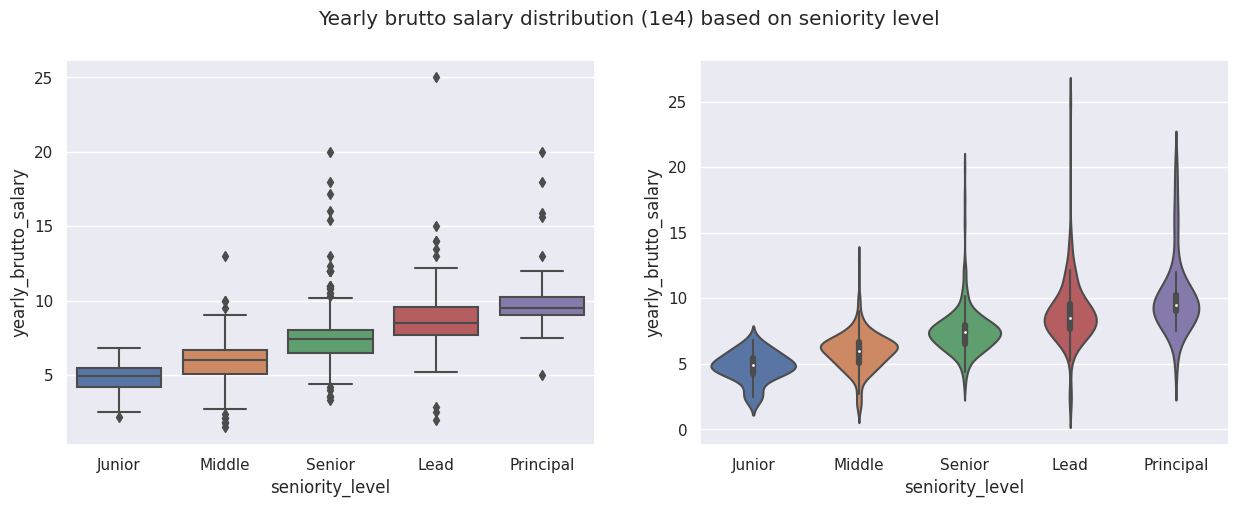

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Yearly brutto salary distribution (1e4) based on seniority level')
sns.boxplot(x='seniority_level', y='yearly_brutto_salary', data=d1, ax=ax1)
sns.violinplot(x='seniority_level', y='yearly_brutto_salary', data=d1, ax=ax2)


<AxesSubplot: xlabel='yearly_brutto_salary', ylabel='experience_year_germany'>

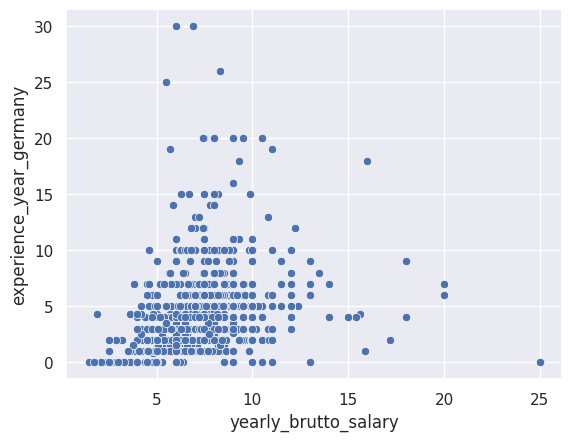

In [68]:
# fig, ax = plt.subplots(1, 1)
fig.suptitle('Yearly brutto salary distribution (1e4) according to experience in years')
sns.scatterplot(x='yearly_brutto_salary', y='experience_year_germany', data=d1)
# sns.lmplot(x='yearly_brutto_salary', y='experience_year_germany', data=d1, fit_reg=True)
# sns.residplot(x='yearly_brutto_salary', y='experience_year_germany', data=d1, lowess=True,)

Analyses with technologies

In [69]:
exploaded = d1.explode(column='main_tech_list')
# print(exploaded)
exploaded.main_tech_list.value_counts()[:10]

python        170
java          160
js             86
php            49
cpp            41
typescript     32
csharp         26
kotlin         24
swift          23
scala          23
Name: main_tech_list, dtype: int64

['python', 'java', 'js', 'php', 'cpp', 'typescript', 'csharp', 'kotlin', 'swift', 'scala']


Text(0.5, 0.98, 'Top 10 technologies')

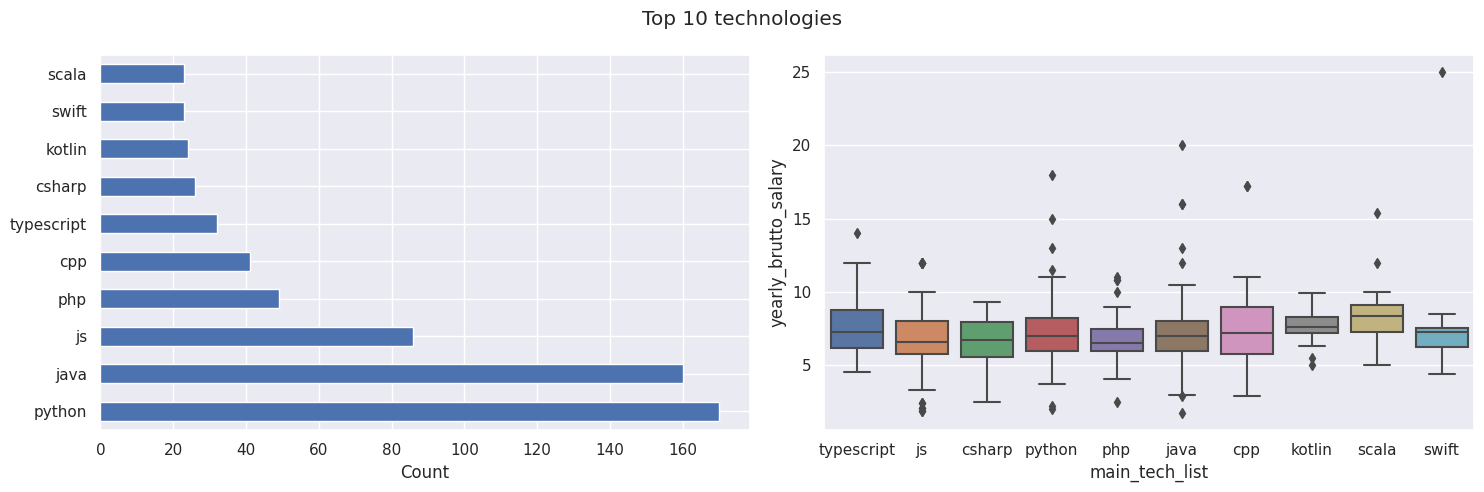

In [105]:
exploaded = d1.explode(column='main_tech_list')
top_10 = exploaded.main_tech_list.value_counts().sort_values(ascending=False)[:10]
top_10_list = top_10.index.tolist()

print(top_10_list)
top_10_tech = exploaded[np.isin(exploaded, top_10_list)]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
top_10.plot(kind='barh', ax=ax1)
ax1.set_xlabel("Count")
sns.boxplot(x='main_tech_list', y='yearly_brutto_salary', data=top_10_tech, ax=ax2)
fig.set_tight_layout(True)
fig.suptitle("Top 10 technologies")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0.98, 'Seniority level distribution for top 10 technologies')

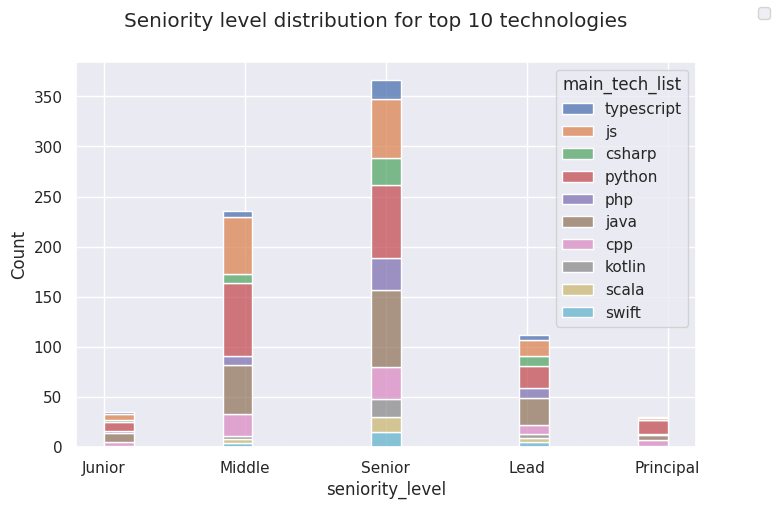

In [106]:
# filtered = d1[np.isin(d1.main_tech_list, top_10_list)]
tech_groups = top_10_tech.groupby('main_tech_list')
tech_groups.get_group("cpp").describe()
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.histplot(data=top_10_tech, x='seniority_level', hue='main_tech_list', multiple='stack', discrete=False, ax=ax)
fig.legend()
fig.suptitle("Seniority level distribution for top 10 technologies")

## Correlation analysis

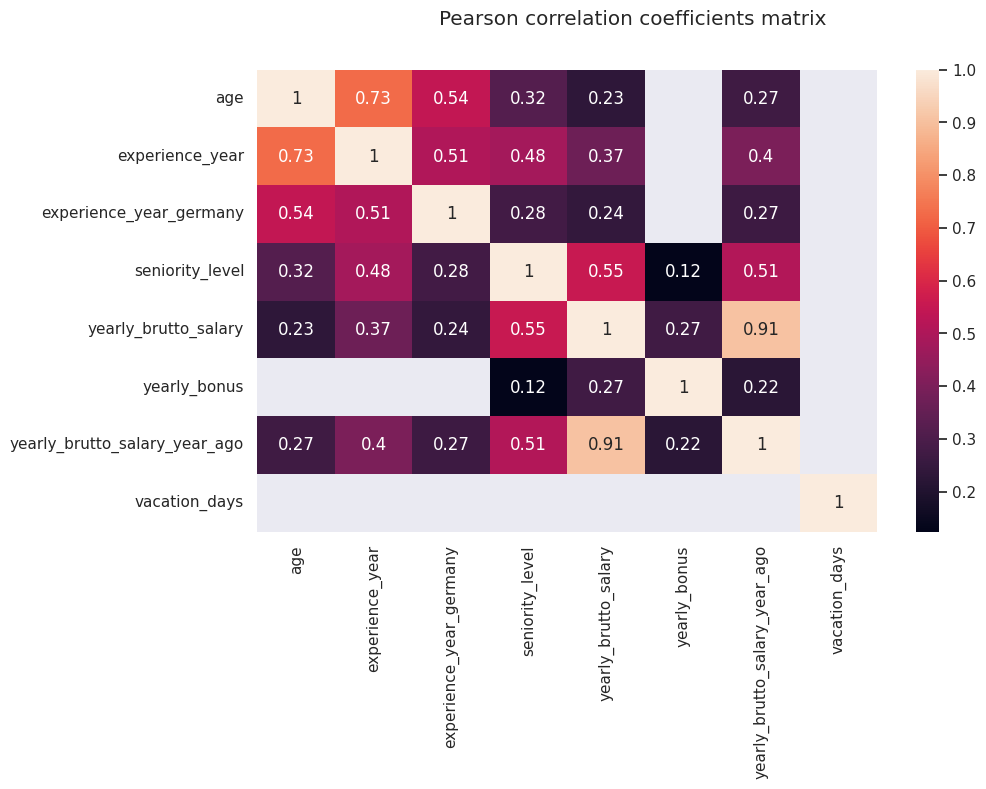

In [72]:
d1_copy = d1.copy()
d1_copy.seniority_level = d1_copy.seniority_level.cat.codes
correlations = d1_copy.corr(method='pearson', numeric_only=True)
correlations = correlations[(correlations < -0.1) | (correlations > 0.1)]
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
fig.suptitle('Pearson correlation coefficients matrix')
sns.heatmap(correlations, annot=True, ax=ax)
plt.show()

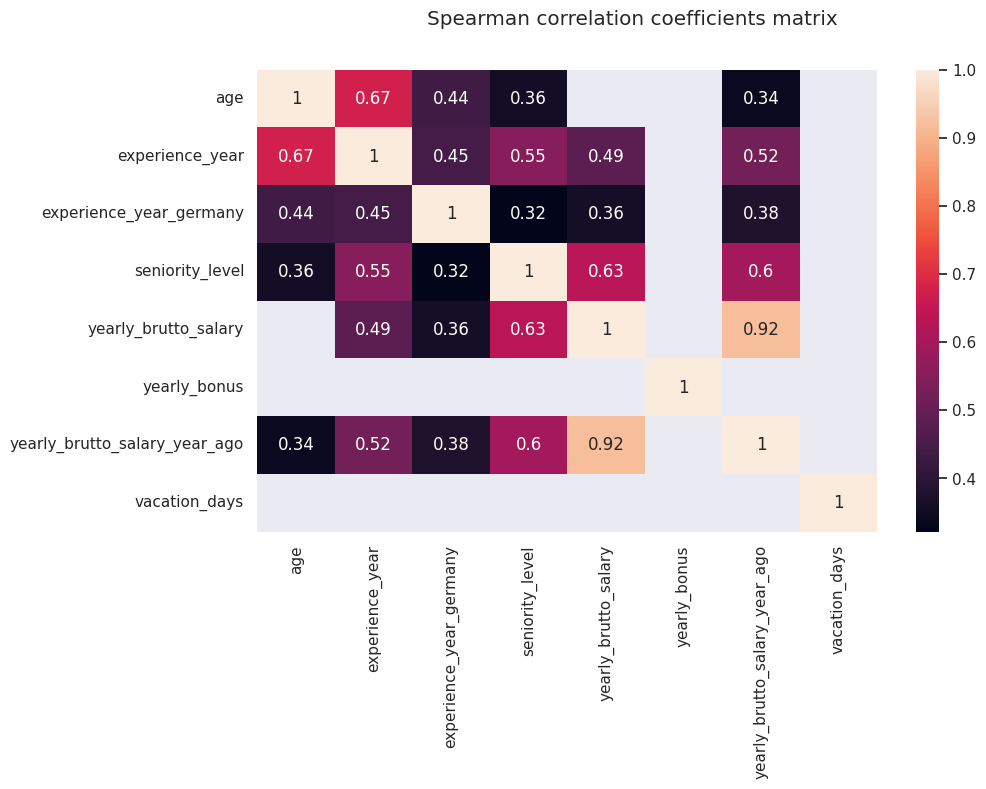

In [73]:
d1_copy = d1.copy()
d1_copy.seniority_level = d1_copy.seniority_level.cat.codes
correlations = d1_copy.corr(method='spearman', numeric_only=True)
correlations = correlations[(correlations < -0.1) | (correlations > 0.3)]
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
fig.suptitle('Spearman correlation coefficients matrix')
sns.heatmap(correlations, annot=True, ax=ax)
plt.show()

### Data cleaning
#### Normalization to rang 0-1
`(v - min)/(max - min)`

In [108]:
d1.isna().sum()

Timestamp                         0
main_tech_list                    0
age                               0
gender                            5
city                              0
position                          2
experience_year                   0
experience_year_germany           0
seniority_level                   0
main_tech                         0
other_tech                       79
yearly_brutto_salary              0
yearly_bonus                      0
yearly_brutto_salary_year_ago     0
vacation_days                     0
employment_status                 2
contract_duration                 5
main_language                     1
company_size                      0
company_type                      3
lost_job                          8
dtype: int64